In [1]:
import pandas as pd

### Question 1:
### Anova
### Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at
### targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10
### assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the
### following points:
### Pat – 5, 4, 4, 3, 9, 4
### Jack – 4, 8, 7, 5, 1, 5
### Alex – 9, 9, 8, 10, 4, 10
### Based on the above results we would like to know who the best archer is. In other words our null hypothesis is that the means of all populations are equal.

In [2]:
Pat=[5, 4, 4, 3, 9, 4]
Jack=[4, 8, 7, 5, 1, 5]
Alex=[9, 9, 8, 10, 4, 10]

In [3]:
scores= Pat+Jack+Alex
archer=(["Pat"]*len(Pat))+(["Jack"]*len(Jack))+(["Alex"]*len(Alex))
print(scores)
print(archer)

[5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]
['Pat', 'Pat', 'Pat', 'Pat', 'Pat', 'Pat', 'Jack', 'Jack', 'Jack', 'Jack', 'Jack', 'Jack', 'Alex', 'Alex', 'Alex', 'Alex', 'Alex', 'Alex']


In [4]:
data=pd.DataFrame({"Archer":archer,"Score":scores})
data

,Archer,Score
0,Pat,5
1,Pat,4
2,Pat,4
3,Pat,3
4,Pat,9
5,Pat,4
6,Jack,4
7,Jack,8
8,Jack,7
9,Jack,5


In [5]:
data.describe()

,Score
count,18.000000
mean,6.055556
std,2.711028
min,1.000000
25%,4.000000
50%,5.000000
75%,8.750000
max,10.000000


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
lm = ols('Score ~ Archer',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq    mean_sq         F    PR(>F)
Archer     2.0  46.777778  23.388889  4.488273  0.029668
Residual  15.0  78.166667   5.211111       NaN       NaN


### By the above table, we came to know P<0.05(Reject the null hypothesis), then there is a statistical differences are available.

### Now we will analyze by manual other than stats.anova_lm library

### We can compare between_group variations and within_group variations, means to validate any statistcal differences exist or not

In [16]:
overall_mean=data["Score"].mean()
overall_mean

6.055555555555555

In [18]:
# Calculation of sum of squares within groups
pat_score=pd.Series(Pat)
jack_score=pd.Series(Jack)
alex_score=pd.Series(Alex)
pat_mean=pat_score.mean()
jack_mean=jack_score.mean()
alex_mean=alex_score.mean()
ssw_data=sum((pat_score-pat_mean)**2)+sum((jack_score-jack_mean)**2)+sum((alex_score-alex_mean)**2)
ssw_data

78.16666666666666

In [20]:
# calculation of sum of squares between groups
scores=pd.Series(data["Score"])
totalsum_squares=sum((scores-overall_mean)**2)
print("total sum of squares",totalsum_squares)
ssa_data=totalsum_squares-ssw_data
ssa_data # Sum of Squares between groups->ssa_data

total sum of squares 124.94444444444446


46.7777777777778

### calculation of mean square explained(MSA) and mean square residual(MSW)

In [26]:
n_groups=len(set(data["Archer"])) #number of groups in data
n_obs=data.shape[0] #number of observations/rows in data
df_residual=n_obs-n_groups # degree of freedom (number of observations-number of groups)=18-3=15
msw_data=ssw_data/df_residual # mean square residual is sum of squares within groups divide by degree of freedom
msw_data

5.21111111111111

In [28]:
df_explained=n_groups-1 # degree of freedom of groups is (total number of groups)-1=3-1
msa_data=ssa_data/df_explained # mean square residual is sum of squares between groups divide by degree of freedom
msa_data 

23.3888888888889

### Calculation of F value

In [29]:
f=msa_data/msw_data
f

4.488272921108745

In [30]:
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f,df_explained,df_residual)
p_value

0.029667763955533277

### Now we can easily verify by manual and using anova_lm method, p<0.05 and reject the null hypothesis, means there is statistical difference exists

### Now we need to findout the best archer, so we can take groupby function and obtain the means for every archer

In [8]:
data.groupby(by="Archer").mean()

,Score
Archer,
Alex,8.333333
Jack,5.000000
Pat,4.833333


In [9]:
df1=data.groupby(by="Archer").mean().reset_index()
df1

,Archer,Score
0,Alex,8.333333
1,Jack,5.000000
2,Pat,4.833333


c:\users\saibhagavan\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


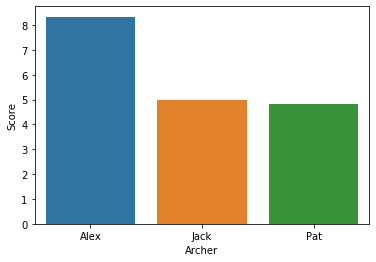

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(df1["Archer"],df1["Score"])
plt.show()

### By the above mean of the scores for every archer, we came to know that "Alex" is the best archer to score more than remaining archers